<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab으로 열기</a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />GitHub에서 소스보기</a>
    </td>
</table>

# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [23]:
from IPython.display import YouTubeVideo, Image
import numpy as np
import matplotlib.pyplot as plt

In [17]:
Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

### 경사 하강법을 수학으로 쉽게 이해하기

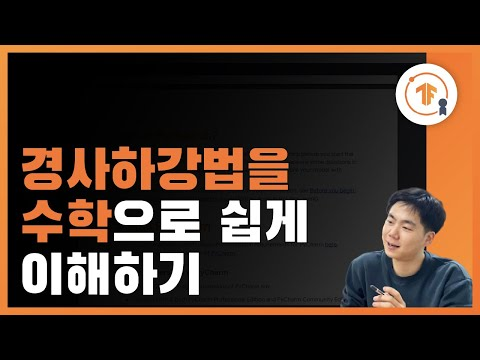

In [9]:
YouTubeVideo('GEdLNvPIbiM')

### 경사 하강법을 활용한 파이썬 코드 구현

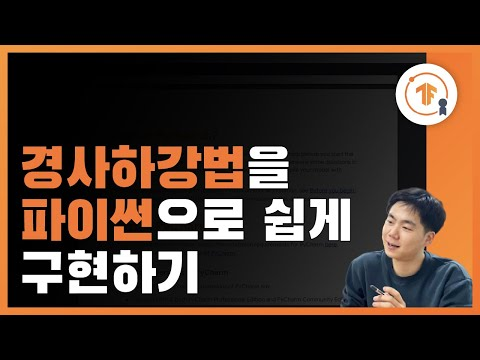

In [8]:
YouTubeVideo('KgH3ZWmMxLE')

## 샘플에 활용할 데이터 셋 만들기

In [170]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

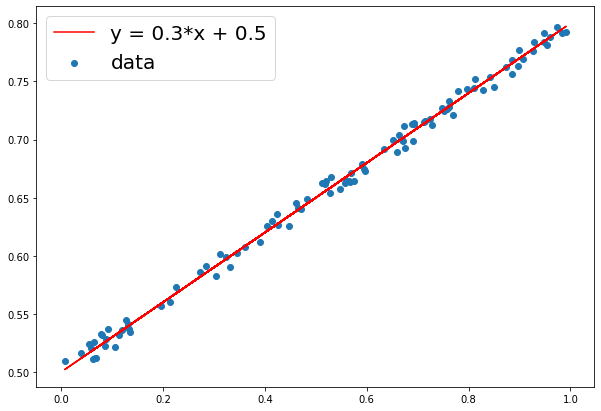

w: 0.3, b: 0.5


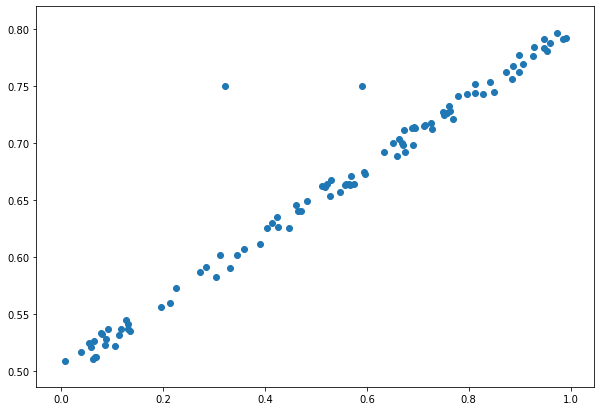

In [371]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)
# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5] = 0.75
y[10] = 0.75

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [200]:
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [207]:
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [209]:
error = (y_hat - y) ** 2

## 학습률 (Learning Rate)

In [214]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [372]:
# 최대 반복 횟수
num_epoch = 5000

# 학습율 (learning_rate)
learning_rate = 0.5

In [373]:
errors = []
# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = -0.46180, b = 0.36141 error = 2.62472
 5 w = -0.14031, b = 0.74770 error = 0.01775
10 w = -0.07254, b = 0.71248 error = 0.01277
15 w = -0.01624, b = 0.68073 error = 0.00925
20 w = 0.03144, b = 0.65382 error = 0.00672
25 w = 0.07182, b = 0.63103 error = 0.00491
30 w = 0.10601, b = 0.61173 error = 0.00361
35 w = 0.13497, b = 0.59539 error = 0.00268
40 w = 0.15950, b = 0.58155 error = 0.00201
45 w = 0.18027, b = 0.56982 error = 0.00153
50 w = 0.19786, b = 0.55990 error = 0.00119
55 w = 0.21276, b = 0.55149 error = 0.00094
60 w = 0.22538, b = 0.54437 error = 0.00076
65 w = 0.23607, b = 0.53834 error = 0.00064
70 w = 0.24512, b = 0.53323 error = 0.00054
------------------------------------------------------------
74 w = 0.2, b = 0.5 error = 0.00049


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

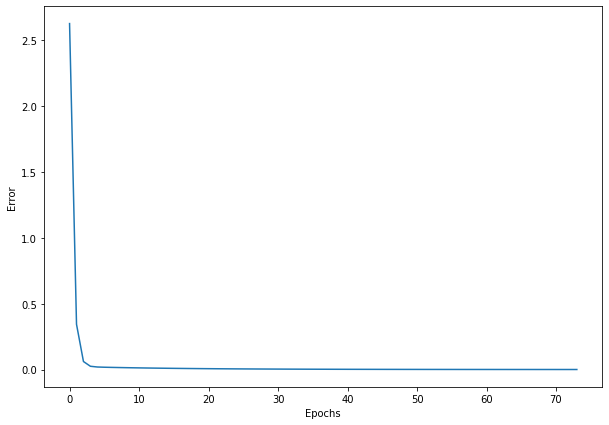

In [374]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [376]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

In [377]:
w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

**다항식을 정의**합니다.

In [378]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

## Gradient Descent 구현 (다항식)

In [382]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b1 = np.random.uniform(low=-1.0, high=1.0)
b2 = np.random.uniform(low=-1.0, high=1.0)
b3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b

    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break

    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()

    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    b = b - learning_rate * (y_hat - y).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = -0.46091, w2 = -0.19362, w3 = 0.10120, b = 1.55921 error = 3.59777
 5 w1 = -0.32075, w2 = -0.05618, w3 = 0.19562, b = 1.54160 error = 0.08839
10 w1 = -0.24220, w2 = 0.01936, w3 = 0.23409, b = 1.44080 error = 0.06879
15 w1 = -0.17415, w2 = 0.08407, w3 = 0.27131, b = 1.35162 error = 0.05367
20 w1 = -0.11510, w2 = 0.13957, w3 = 0.30690, b = 1.27268 error = 0.04197
25 w1 = -0.06379, w2 = 0.18725, w3 = 0.34060, b = 1.20277 error = 0.03288
30 w1 = -0.01915, w2 = 0.22827, w3 = 0.37226, b = 1.14084 error = 0.02580
35 w1 = 0.01974, w2 = 0.26361, w3 = 0.40181, b = 1.08596 error = 0.02027
40 w1 = 0.05367, w2 = 0.29410, w3 = 0.42925, b = 1.03731 error = 0.01595
45 w1 = 0.08330, w2 = 0.32044, w3 = 0.45461, b = 0.99416 error = 0.01256
50 w1 = 0.10921, w2 = 0.34324, w3 = 0.47795, b = 0.95589 error = 0.00990
55 w1 = 0.13190, w2 = 0.36298, w3 = 0.49936, b = 0.92192 error = 0.00782
60 w1 = 0.15177, w2 = 0.38012, w3 = 0.51893, b = 0.89178 error = 0.00617
65 w1 = 0.16921, w2 = 0.39500, w3 = 0.5367

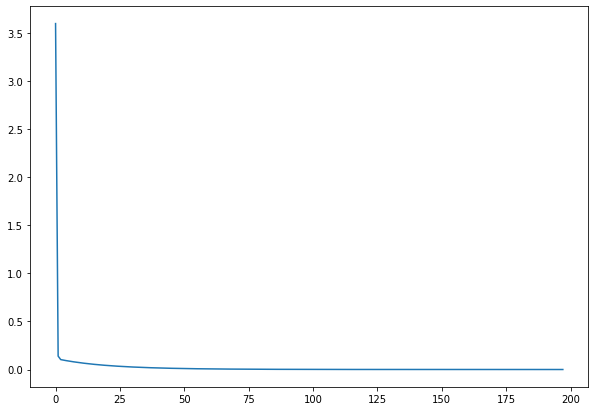

In [383]:
plt.figure(figsize=(10, 7))

plt.plot(errors)

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

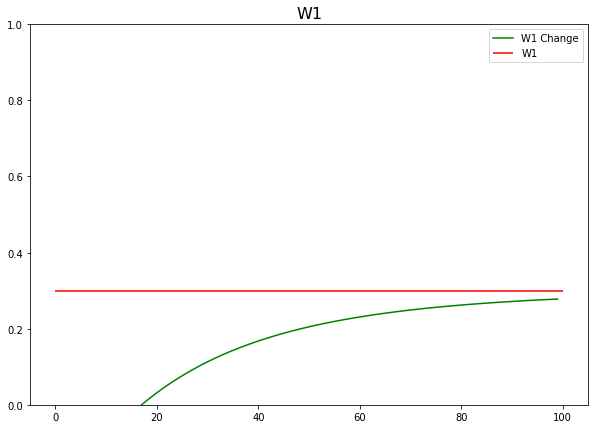

In [270]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

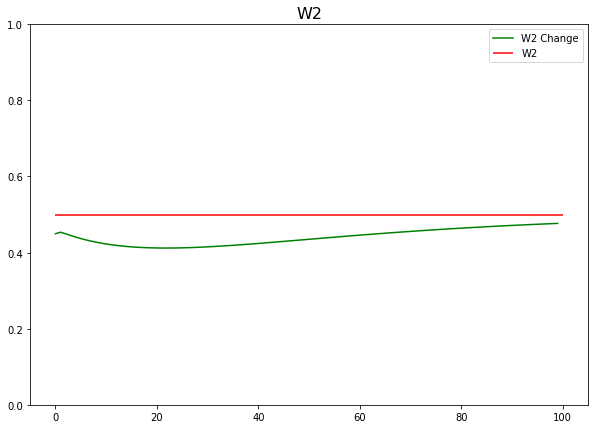

In [271]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

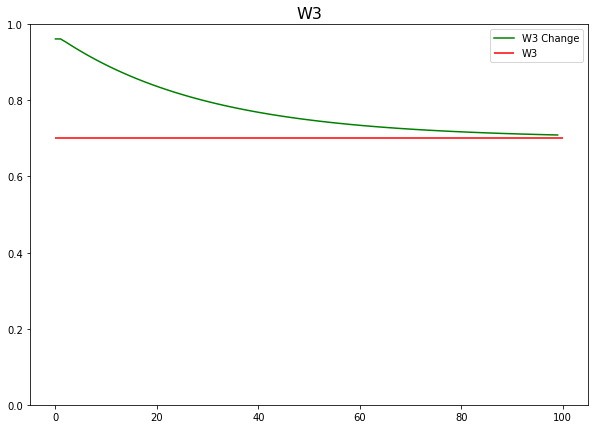

In [272]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()

## 경사하강법을 활용한 SGDRegressor

[SGDRegressor 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [273]:
from sklearn.linear_model import SGDRegressor

In [357]:
model = SGDRegressor(max_iter=5000, tol=1e-5, learning_rate='constant')

In [358]:
x1 = x1.reshape(-1, 1)
x2 = x2.reshape(-1, 1)
x3 = x3.reshape(-1, 1)

In [359]:
X = np.concatenate([x1, x2, x3], axis=1)

In [360]:
X.shape

(100, 3)

In [361]:
model.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=1e-05, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [362]:
model.coef_

array([0.2868208 , 0.47813082, 0.68244513])

In [363]:
model.intercept_

array([0.27063858])

In [364]:
print("w1 = {:.1f}, w2 = {:.1f}, w3 = {:.1f}, b = {:.1f}".format(model.coef_[0], model.coef_[1], model.coef_[2], model.intercept_[0]))

w1 = 0.3, w2 = 0.5, w3 = 0.7, b = 0.3
